In [1]:
!pip install -q darts

     |████████████████████████████████| 253 kB 4.1 MB/s 
     |████████████████████████████████| 10.3 MB 32.9 MB/s 
     |████████████████████████████████| 155 kB 69.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.1 MB/s 
     |████████████████████████████████| 2.0 MB 44.2 MB/s 
     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 1.4 MB 50.9 MB/s 
     |████████████████████████████████| 788 kB 34.1 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 177 kB 71.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 9.9 MB 65.6 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
     |████████████████████████████████| 62 kB 916 kB/s 
     |████████████████████████████████| 374 kB 57.6 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 214 kB 60.1 MB/s 
ERROR: pip's depende

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 102 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.12.0 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from darts import TimeSeries
from darts.models import RNNModel, BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
from darts.utils.statistics import check_seasonality,extract_trend_and_seasonality,plot_acf,plot_hist

In [4]:
df = pd.read_csv('/content/airline-passengers.csv')

In [5]:
df.shape

(144, 2)

In [6]:
series = TimeSeries.from_dataframe(df,'Month','Passengers')

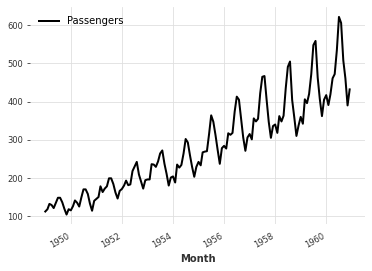

In [7]:
series.plot()

In [8]:
check_seasonality(series)

(True, 12)

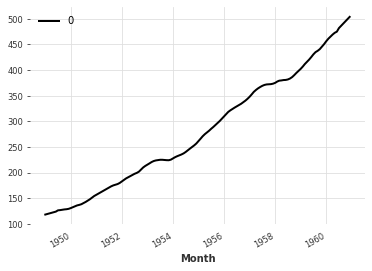

In [9]:
extract_trend_and_seasonality(series)[0].plot()

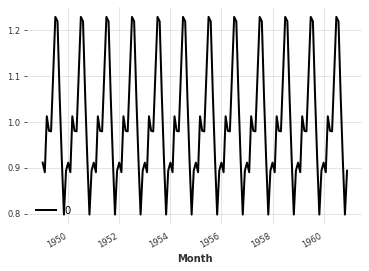

In [10]:
extract_trend_and_seasonality(series)[1].plot()

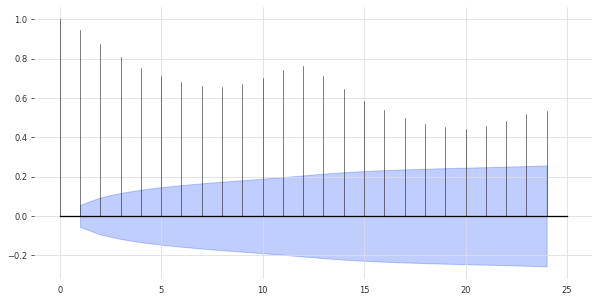

In [11]:
plot_acf(series)

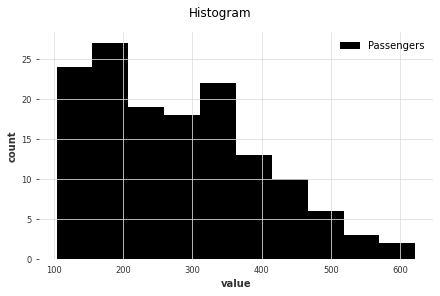

In [12]:
plot_hist(series)

In [16]:
correlations = df.corr()

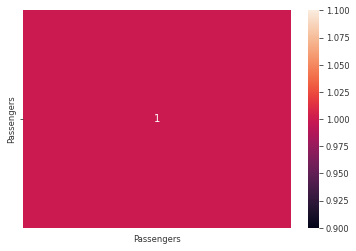

In [18]:
sns.heatmap(correlations,annot=True)
plt.show()

In [21]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('1959-01-01'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# LSTM Univaraite

In [22]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=12,
    force_reset=True
)

In [23]:
my_model.fit(train_transformed,
             verbose=True)

[2021-10-22 13:23:41,422] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 13:23:41,422] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 13:23:41,436] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 13:23:41,436] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  0%|          | 2/500 [00:00<00:42, 11.61it/s]

  2%|▏         | 12/500 [00:00<00:38, 12.54it/s]

  4%|▍         | 22/500 [00:01<00:38, 12.46it/s]

  6%|▋         | 32/500 [00:02<00:36, 12.79it/s]

  8%|▊         | 42/500 [00:03<00:36, 12.69it/s]

 10%|█         | 52/500 [00:04<00:35, 12.62it/s]

 12%|█▏        | 62/500 [00:04<00:34, 12.77it/s]

 14%|█▍        | 72/500 [00:05<00:32, 13.00it/s]

 16%|█▋        | 82/500 [00:06<00:32, 12.87it/s]

 18%|█▊        | 92/500 [00:07<00:31, 12.81it/s]

 20%|██        | 102/500 [00:08<00:31, 12.79it/s]

 22%|██▏       | 112/500 [00:08<00:29, 13.02it/s]

 24%|██▍       | 122/500 [00:09<00:29, 13.00it/s]

 26%|██▋       | 132/500 [00:10<00:28, 12.86it/s]

 28%|██▊       | 142/500 [00:11<00:28, 12.63it/s]

 30%|███       | 152/500 [00:11<00:27, 12.76it/s]

 32%|███▏      | 162/500 [00:12<00:25, 13.03it/s]

 34%|███▍      | 172/500 [00:13<00:25, 12.82it/s]

 36%|███▋      | 182/500 [00:14<00:24, 12.79it/s]

 38%|███▊      | 192/500 [00:15<00:23, 12.96it/s]

 40%|████      | 202/500 [00:15<00:22, 13.12it/s]

 42%|████▏     | 212/500 [00:16<00:22, 13.05it/s]

 44%|████▍     | 222/500 [00:17<00:21, 13.00it/s]

 46%|████▋     | 232/500 [00:18<00:21, 12.70it/s]

 48%|████▊     | 242/500 [00:18<00:19, 13.00it/s]

 50%|█████     | 252/500 [00:19<00:19, 12.82it/s]

 52%|█████▏    | 262/500 [00:20<00:18, 13.05it/s]

 54%|█████▍    | 272/500 [00:21<00:18, 12.47it/s]

 56%|█████▋    | 282/500 [00:22<00:17, 12.71it/s]

 58%|█████▊    | 292/500 [00:22<00:16, 12.89it/s]

 60%|██████    | 302/500 [00:23<00:15, 12.89it/s]

 62%|██████▏   | 312/500 [00:24<00:14, 12.77it/s]

 64%|██████▍   | 322/500 [00:25<00:13, 12.84it/s]

 66%|██████▋   | 332/500 [00:25<00:13, 12.90it/s]

 68%|██████▊   | 342/500 [00:26<00:12, 12.95it/s]

 70%|███████   | 352/500 [00:27<00:11, 12.89it/s]

 72%|███████▏  | 362/500 [00:28<00:10, 12.61it/s]

 74%|███████▍  | 372/500 [00:29<00:10, 12.72it/s]

 76%|███████▋  | 382/500 [00:29<00:09, 12.76it/s]

 78%|███████▊  | 392/500 [00:30<00:08, 12.87it/s]

 80%|████████  | 402/500 [00:31<00:07, 12.58it/s]

 82%|████████▏ | 412/500 [00:32<00:07, 12.39it/s]

 84%|████████▍ | 422/500 [00:33<00:06, 12.62it/s]

 86%|████████▋ | 432/500 [00:33<00:05, 12.61it/s]

 88%|████████▊ | 442/500 [00:34<00:04, 12.81it/s]

 90%|█████████ | 452/500 [00:35<00:03, 12.77it/s]

 92%|█████████▏| 462/500 [00:36<00:03, 12.59it/s]

 94%|█████████▍| 472/500 [00:37<00:02, 12.73it/s]

 96%|█████████▋| 482/500 [00:37<00:01, 12.88it/s]

 98%|█████████▊| 492/500 [00:38<00:00, 12.89it/s]

100%|██████████| 500/500 [00:39<00:00, 12.76it/s]


In [24]:
predicted = my_model.predict(n=len(val_transformed))

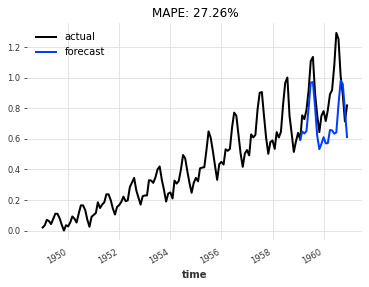

In [25]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()

# LSTM Multivariate - Future

In [28]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp('19590101'))

In [31]:
my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=500,
    optimizer_kwargs={'lr': 1e-3}, 
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=12,
    force_reset=True
)

In [32]:
my_model.fit(train_transformed,
             future_covariates=covariates,
             verbose=True)

[2021-10-22 13:30:44,220] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 13:30:44,220] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 101 samples.
[2021-10-22 13:30:44,253] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 13:30:44,253] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  0%|          | 1/500 [00:02<16:44,  2.01s/it]

  2%|▏         | 11/500 [00:21<16:08,  1.98s/it]

  4%|▍         | 21/500 [00:41<15:51,  1.99s/it]

  6%|▌         | 31/500 [01:01<15:13,  1.95s/it]

  8%|▊         | 41/500 [01:20<14:58,  1.96s/it]

 10%|█         | 51/500 [01:40<14:44,  1.97s/it]

 12%|█▏        | 61/500 [02:00<14:27,  1.98s/it]

 14%|█▍        | 71/500 [02:20<14:07,  1.98s/it]

 16%|█▌        | 81/500 [02:39<13:44,  1.97s/it]

 18%|█▊        | 91/500 [02:59<13:28,  1.98s/it]

 20%|██        | 101/500 [03:19<13:04,  1.97s/it]

 22%|██▏       | 111/500 [03:38<12:45,  1.97s/it]

 24%|██▍       | 121/500 [03:58<12:25,  1.97s/it]

 26%|██▌       | 131/500 [04:18<12:04,  1.96s/it]

 28%|██▊       | 141/500 [04:37<11:40,  1.95s/it]

 30%|███       | 151/500 [04:57<11:26,  1.97s/it]

 32%|███▏      | 161/500 [05:16<11:02,  1.95s/it]

 34%|███▍      | 171/500 [05:36<10:45,  1.96s/it]

 36%|███▌      | 181/500 [05:56<10:53,  2.05s/it]

 38%|███▊      | 191/500 [06:18<11:31,  2.24s/it]

 40%|████      | 201/500 [06:41<11:35,  2.33s/it]

 42%|████▏     | 211/500 [07:05<11:15,  2.34s/it]

 44%|████▍     | 221/500 [07:29<10:06,  2.17s/it]

 46%|████▌     | 231/500 [07:48<08:58,  2.00s/it]

 48%|████▊     | 241/500 [08:08<08:36,  1.99s/it]

 50%|█████     | 251/500 [08:29<08:18,  2.00s/it]

 52%|█████▏    | 261/500 [08:49<07:59,  2.01s/it]

 54%|█████▍    | 271/500 [09:09<07:38,  2.00s/it]

 56%|█████▌    | 281/500 [09:29<07:18,  2.00s/it]

 58%|█████▊    | 291/500 [09:49<06:56,  1.99s/it]

 60%|██████    | 301/500 [10:11<06:55,  2.09s/it]

 62%|██████▏   | 311/500 [10:31<06:19,  2.01s/it]

 64%|██████▍   | 321/500 [10:51<05:59,  2.01s/it]

 66%|██████▌   | 331/500 [11:11<05:37,  2.00s/it]

 68%|██████▊   | 341/500 [11:31<05:17,  2.00s/it]

 70%|███████   | 351/500 [11:51<04:56,  1.99s/it]

 72%|███████▏  | 361/500 [12:11<04:36,  1.99s/it]

 74%|███████▍  | 371/500 [12:31<04:17,  2.00s/it]

 76%|███████▌  | 381/500 [12:51<03:59,  2.01s/it]

 78%|███████▊  | 391/500 [13:11<03:39,  2.01s/it]

 80%|████████  | 401/500 [13:31<03:17,  1.99s/it]

 82%|████████▏ | 411/500 [13:51<02:57,  1.99s/it]

 84%|████████▍ | 421/500 [14:11<02:37,  1.99s/it]

 86%|████████▌ | 431/500 [14:31<02:18,  2.01s/it]

 88%|████████▊ | 441/500 [14:51<01:57,  1.99s/it]

 90%|█████████ | 451/500 [15:11<01:37,  1.99s/it]

 92%|█████████▏| 461/500 [15:31<01:17,  1.99s/it]

 94%|█████████▍| 471/500 [15:50<00:57,  1.99s/it]

 96%|█████████▌| 481/500 [16:10<00:37,  2.00s/it]

 98%|█████████▊| 491/500 [16:30<00:17,  1.99s/it]

100%|██████████| 500/500 [16:48<00:00,  2.02s/it]


In [33]:
predicted = my_model.predict(n=len(val_transformed))

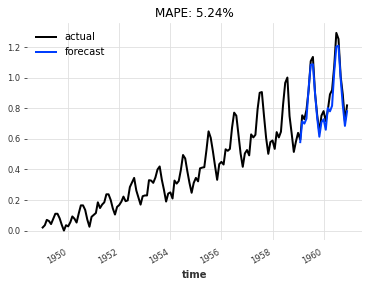

In [34]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()

# LSTM Multivariate - Past

In [35]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=len(train_transformed)),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)

In [36]:
len(covariates)

121

In [39]:
my_model = BlockRNNModel(
    model='LSTM',
    input_chunk_length=12,
    output_chunk_length=10,
    n_epochs=300,
    random_state=0
)

In [40]:
my_model.fit(train_transformed,
             past_covariates=covariates,
             verbose=True)

[2021-10-22 13:50:56,690] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 100 samples.
[2021-10-22 13:50:56,690] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 100 samples.
[2021-10-22 13:50:56,698] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-22 13:50:56,698] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|▏         | 4/300 [00:00<00:18, 15.66it/s]

  5%|▍         | 14/300 [00:00<00:17, 16.60it/s]

  8%|▊         | 24/300 [00:01<00:16, 16.35it/s]

 11%|█▏        | 34/300 [00:02<00:16, 16.58it/s]

 15%|█▍        | 44/300 [00:02<00:15, 16.67it/s]

 18%|█▊        | 54/300 [00:03<00:14, 16.44it/s]

 21%|██▏       | 64/300 [00:03<00:14, 16.78it/s]

 25%|██▍       | 74/300 [00:04<00:13, 16.71it/s]

 28%|██▊       | 84/300 [00:05<00:13, 16.44it/s]

 31%|███▏      | 94/300 [00:05<00:12, 16.30it/s]

 35%|███▍      | 104/300 [00:06<00:11, 16.59it/s]

 38%|███▊      | 114/300 [00:06<00:10, 16.94it/s]

 41%|████▏     | 124/300 [00:07<00:10, 16.13it/s]

 45%|████▍     | 134/300 [00:08<00:10, 16.39it/s]

 48%|████▊     | 144/300 [00:08<00:09, 16.48it/s]

 51%|█████▏    | 154/300 [00:09<00:09, 16.19it/s]

 55%|█████▍    | 164/300 [00:09<00:08, 16.46it/s]

 58%|█████▊    | 174/300 [00:10<00:07, 16.36it/s]

 61%|██████▏   | 184/300 [00:11<00:06, 16.91it/s]

 65%|██████▍   | 194/300 [00:11<00:06, 16.71it/s]

 68%|██████▊   | 204/300 [00:12<00:05, 16.35it/s]

 71%|███████▏  | 214/300 [00:12<00:05, 16.61it/s]

 75%|███████▍  | 224/300 [00:13<00:04, 15.91it/s]

 78%|███████▊  | 234/300 [00:14<00:03, 16.70it/s]

 81%|████████▏ | 244/300 [00:14<00:03, 16.69it/s]

 85%|████████▍ | 254/300 [00:15<00:02, 16.14it/s]

 88%|████████▊ | 264/300 [00:16<00:02, 16.31it/s]

 91%|█████████▏| 274/300 [00:16<00:01, 16.51it/s]

 95%|█████████▍| 284/300 [00:17<00:00, 16.78it/s]

 98%|█████████▊| 294/300 [00:17<00:00, 16.93it/s]

100%|██████████| 300/300 [00:18<00:00, 16.44it/s]


In [43]:
predicted = my_model.predict(n=10)

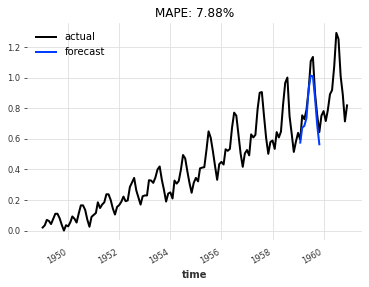

In [44]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed[:11])))
plt.legend()
plt.show()